# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

**The context:** <br>

The problem of accurately detecting facial emotions is important to solve for several reasons:

1. Human-computer interaction: The ability to detect facial emotions can be used to improve the user experience in applications such as virtual assistants, chatbots, and gaming.
2. Surveillance systems: Facial emotion recognition can be used in surveillance systems to detect and respond to emotions of individuals in public spaces.
Healthcare: It can be used for mental health diagnosis and treatment, by detecting emotions and providing appropriate therapy.
3. Robotics: It can be used to make robots more human-like and able to interact with people in a more natural way.
4. Social understanding: Facial emotion recognition can be used to understand and improve social interactions. It can be used in psychological research and education.
5. Accessibility: It can also be used to improve the accessibility of technology for people with disabilities, such as those with autism or other conditions that affect social interactions.
6. Business: It can be used in the business field, such as marketing, to understand the audience's emotional response to products, or in customer service to improve the interaction with clients.

Overall, the ability to accurately detect facial emotions has the potential to improve many areas of our lives and make technology more accessible and user-friendly.

**The objectives:** <br>

The main goal of solving the problem of facial emotion recognition is to develop a model that can accurately recognize basic emotions from images or videos of human faces, is robust to variations and can run in real-time, and also taking into account the intended use case, ethical and legal issues.

**The key questions:** What are the key questions that need to be answered?<br>

When working on the problem of facial emotion recognition, there are several key questions that need to be answered:

1. What is the best way to represent facial emotions in a model? This typically involves deciding on a set of basic emotions to recognize and determining the features of the face that are most relevant for recognizing these emotions.
2. What is the best algorithm to use for recognizing facial emotions? This typically involves comparing different algorithms and evaluating their performance on a dataset of labeled images or videos.
3. How can the model be made robust to variations in lighting, facial expressions, and angles? This typically involves using techniques such as data augmentation, transfer learning, and ensembling to increase the diversity of the data and improve the model's ability to generalize.
4. How can the model be made to run in real-time? This typically involves using techniques such as model compression and quantization, or using specialized hardware such as GPUs or TPUs.
5. How can the model be made to respect the privacy and civil liberties of the individuals who will be affected by the technology? This typically involves implementing techniques such as differential privacy and federated learning to prevent the identification of individuals.
6. How can the model be made to comply with laws and regulations? This typically involves seeking legal advice and consulting with relevant authorities.
7. How can the model be deployed in the real world? This typically involves evaluating the model in real-world scenarios and addressing any issues that arise.
8. How can the model be evaluated and benchmarked? This typically involves comparing the model's performance against other state-of-the-art models, as well as evaluating its performance in real-world scenarios.

**The problem formulation:** 

We are trying to develop a model that can accurately recognize a set of basic emotions from images of human faces. To solve this problem, we will try to use a combination of techniques from computer vision, machine learning, and deep learning. This will include using feature extraction techniques to extract relevant information from the images, such as the shape, texture, and color of the face. In recent years, deep learning techniques have become increasingly popular for facial emotion recognition due to their ability to automatically learn features from the data and achieve high accuracy. Additionally, we will  need to consider the intended use case of the model, ethical and legal issues and how the model can be deployed in real-world scenarios.


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import tensorflow as tf

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow import keras

### **Loading the data**

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Data Summary**

This will give us an overall understanding of the data

In [ ]:
import os

# initialize variables to store the number of images, image size, and number of images per class
num_images = 0
image_size = None
class_counts = {}

# loop through the main folders 
for main_folder in os.listdir(folder_path):
    # check if the folder is 'test', 'train' or 'validation'
    if main_folder in ['test', 'train', 'validation']:
        # specify the path to the subfolders
        main_folder_path = os.path.join(folder_path, main_folder)
        #loop through the subfolders
        for subfolder in os.listdir(main_folder_path):
            subfolder_path = os.path.join(main_folder_path, subfolder)
            # check if the folder is 'happy', 'sad', 'neutral' or 'surprise'
            if subfolder in ['happy', 'sad', 'neutral', 'surprise']:
                #loop through the images in the subfolder
                for filename in os.listdir(subfolder_path):
                    # increment the number of images
                    num_images += 1
                    # read the image
                    img = cv2.imread(os.path.join(subfolder_path, filename))
                    # get the image size
                    if image_size is None:
                        image_size = img.shape[:2]
                    # increment the count for the class label
                    if subfolder in class_counts:
                        class_counts[subfolder] += 1
                    else:
                        class_counts[subfolder] = 1

# print the data summary
print('Number of images:', num_images)
print('Image size:', image_size)
print('Number of images per class:', class_counts)


Number of images: 20214
Image size: (48, 48)
Number of images per class: {'surprise': 4002, 'happy': 5833, 'neutral': 5226, 'sad': 5153}


## **Data Visualization**

We'll begin by summarizing the data, such as the number of images, the size of the images, and the number of images per class. This will give us an overall understanding of the data.

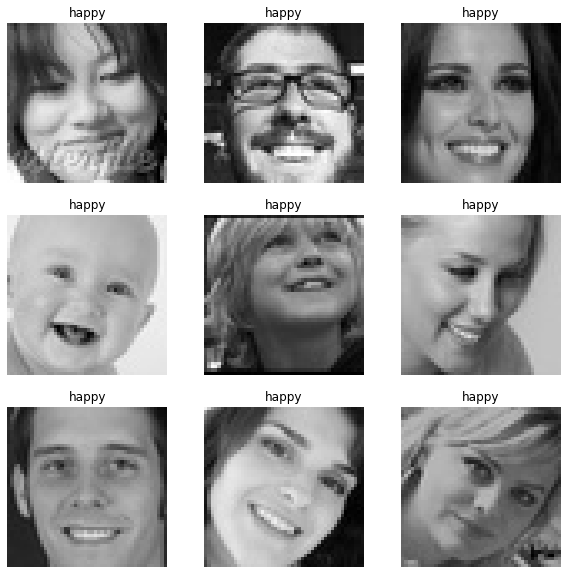

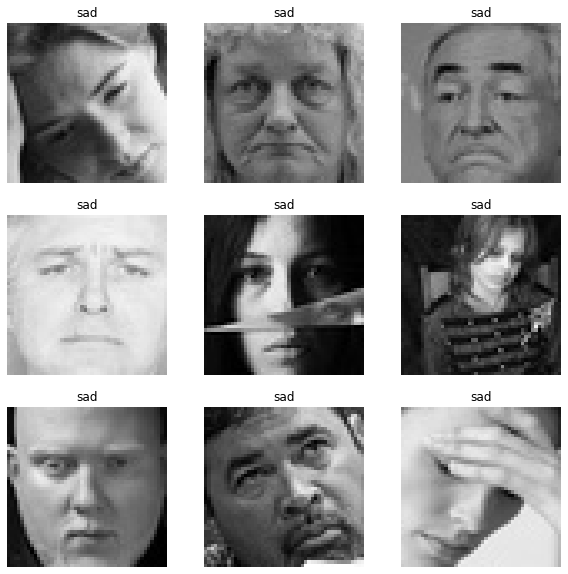

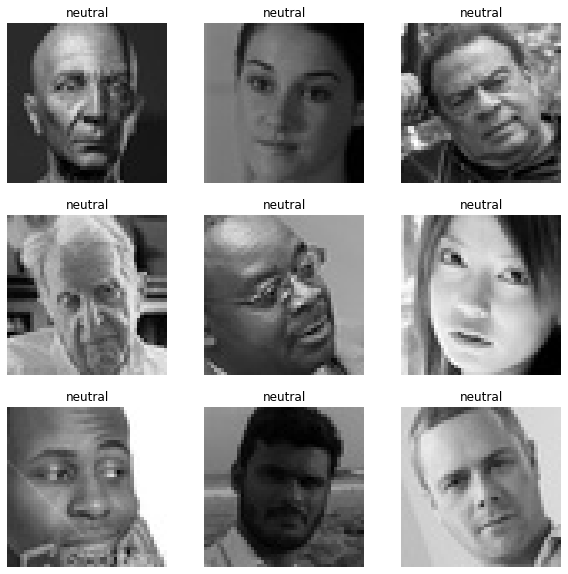

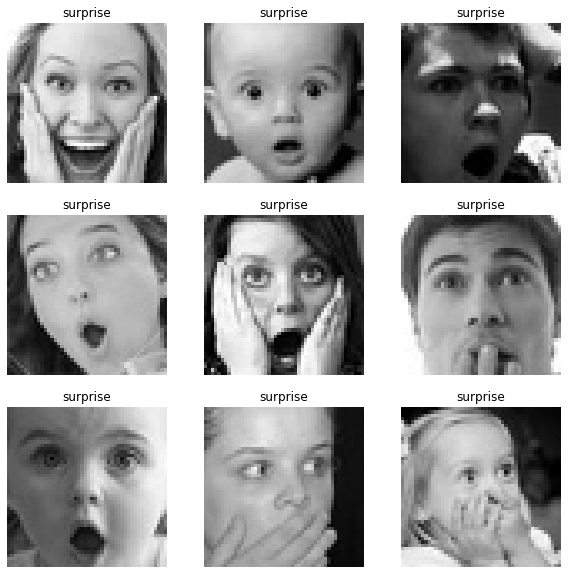

In [ ]:
import random

# initialize a dictionary to store the paths of the images for each class
class_images = {'happy': [], 'sad': [], 'neutral': [], 'surprise': []}

# loop through the main folders 
for main_folder in os.listdir(folder_path):
    # check if the folder is 'test', 'train' or 'validation'
    if main_folder in ['test', 'train', 'validation']:
        # specify the path to the subfolders
        main_folder_path = os.path.join(folder_path, main_folder)
        #loop through the subfolders
        for subfolder in os.listdir(main_folder_path):
            subfolder_path = os.path.join(main_folder_path, subfolder)
            # check if the folder is 'happy', 'sad', 'neutral' or 'surprise'
            if subfolder in ['happy', 'sad', 'neutral', 'surprise']:
                #loop through the images in the subfolder
                for filename in os.listdir(subfolder_path):
                    class_images[subfolder].append(os.path.join(subfolder_path, filename))

# random select the number of images
random_images = {label: random.sample(class_images[label], 10) for label in class_images}

# visualize the images
for label in random_images:
  fig, axs = plt.subplots(3, 3, figsize=(10, 10))
  for i, img_path in enumerate(random_images[label][:9]):
    image = cv2.imread(img_path)
    axs[i//3, i%3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title(label)
  plt.show()







All the images match our intuitive understanding of what faces expressing these specific emotions should look like 

In [ ]:
for label in random_images:
    for img_path in random_images[label]:
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        mean, stddev = cv2.meanStdDev(gray)
        print(f"Lighting conditions for {img_path}: Mean={mean[0][0]:.2f}, Stddev={stddev[0][0]:.2f}")


Lighting conditions for Facial_emotion_images/train/happy/35419.jpg: Mean=144.03, Stddev=66.68
Lighting conditions for Facial_emotion_images/train/happy/22208.jpg: Mean=211.89, Stddev=40.49
Lighting conditions for Facial_emotion_images/train/happy/33479.jpg: Mean=95.79, Stddev=42.38
Lighting conditions for Facial_emotion_images/train/happy/27584.jpg: Mean=174.95, Stddev=47.58
Lighting conditions for Facial_emotion_images/validation/happy/29067.jpg: Mean=62.57, Stddev=37.94
Lighting conditions for Facial_emotion_images/train/happy/28805.jpg: Mean=157.49, Stddev=51.79
Lighting conditions for Facial_emotion_images/train/happy/15947.jpg: Mean=70.25, Stddev=35.27
Lighting conditions for Facial_emotion_images/train/happy/34409.jpg: Mean=164.55, Stddev=58.89
Lighting conditions for Facial_emotion_images/train/happy/32364.jpg: Mean=90.37, Stddev=62.62
Lighting conditions for Facial_emotion_images/train/happy/20930.jpg: Mean=126.92, Stddev=40.91
Lighting conditions for Facial_emotion_images/tra

The output above shows the mean and standard deviation of the pixel values for a sample of images from each class (happy, sad, neutral, and surprise). The mean value represents the average intensity of the pixels in the image, while the standard deviation represents the variation of pixel intensities.

The lighting conditions of an image can affect the appearance of the face and make it harder for a model to correctly recognize facial emotions. Based on the output, we can compare the mean and standard deviation values between images to check if there's a big difference in lighting conditions between them. If the values are similar between images, it indicates that the lighting conditions are consistent, which is a good indication for the quality of the data. If there are significant differences in lighting conditions between images, it may be necessary to apply some image normalization techniques to make the lighting conditions more consistent.

From the output, it seems that lighting conditions are not very consistent between images, which can make it harder for our model to correctly recognize facial emotions. We should consider applying some image normalization techniques to make the lighting conditions more consistent.

## **Checking Distribution of Classes**

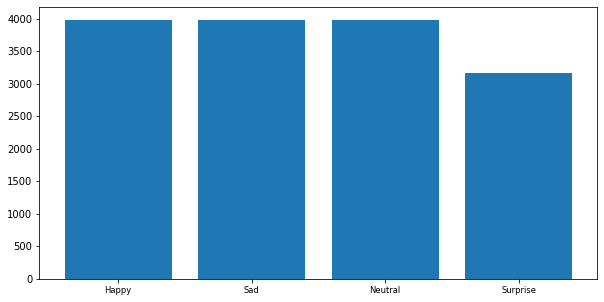

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

* This class distribution is somewhat imbalanced. The difference in the number of images per class is not extremely large, but it could still have an effect on the model's performance. 
* It is better to have a more balanced distribution of classes to ensure that the model is not biased towards any one class. To handle imbalanced data sets, we can try oversampling the minority class, undersampling the majority class or use a combination of both, use cost-sensitive learning, or use a package for handling imbalanced data such as imbalanced-learn. 
* Class imbalance can be a problem for machine learning models because it can lead to the model being biased towards the majority class. This means that the model may have a higher accuracy overall, but it may perform poorly on the minority classes. If the class imbalance is severe, it is possible to oversample the minority class, or use techniques such as cost-sensitive learning to adjust the model's decision boundary to be more sensitive to the minority class. Additionally, we can use precision and recall, F1-score, or ROC-AUC as evaluation metrics instead of accuracy.

## **Creating our Data Loaders**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)


validation_set =  datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)


test_set =  datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

Convolutional Neural Networks (CNNs) are a type of deep learning model that are particularly well-suited for image classification tasks because they are able to learn spatial hierarchies of features from images. These spatial hierarchies are able to capture the local and global features of an image.

Artificial Neural Networks (ANNs) are a more general type of model that can be used for a wide range of tasks, including image classification. However, ANNs may not be able to learn spatial hierarchies of features from images as effectively as CNNs.

In general, it is always a good idea to experiment with different types of models and architectures to determine which is the best fit. It's also worth noting that a combination of both CNNs and ANNs can be used to improve the performance of the model.

Since we are working with a dataset of images and we want to classify emotions from those images, it seems appropriate to use CNNs as the architecture for our model.

### **Creating the Base Neural Network**

### **Compiling and Training the Model**

Lets do some data augmentation: These data augmentation techniques (flipping and rescaling) will help the model generalize better.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train_greyscale = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set_greyscale = datagen_train_greyscale.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation_greyscale = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)


validation_set_greyscale =  datagen_validation_greyscale.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test_greyscale = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)


test_set =  datagen_test_greyscale.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./best_model2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 4,
                              verbose = 1,
                              min_delta = 0.0001)
def build_model():
      model = Sequential()
      model.add(Conv2D(filters=96, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D())
      model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Flatten())
      model.add(Dense(96, activation='relu'))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return model
best_model_2 = build_model()


In [ ]:
callbacks_list = [early_stopping, checkpoint]
history_best_model_2=best_model_2.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)

Epoch 1/30
472/473 [============================>.] - ETA: 0s - loss: 1.3337 - accuracy: 0.3091
Epoch 1: val_accuracy improved from -inf to 0.46072, saving model to ./best_model2.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.3336 - accuracy: 0.3092 - val_loss: 1.2208 - val_accuracy: 0.4607
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.1275 - accuracy: 0.4950
Epoch 2: val_accuracy improved from 0.46072 to 0.54772, saving model to ./best_model2.h5
473/473 [==============================] - 15s 33ms/step - loss: 1.1275 - accuracy: 0.4950 - val_loss: 1.0608 - val_accuracy: 0.5477
Epoch 3/30
472/473 [============================>.] - ETA: 0s - loss: 1.0421 - accuracy: 0.5390
Epoch 3: val_accuracy improved from 0.54772 to 0.55797, saving model to ./best_model2.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.0420 - accuracy: 0.5391 - val_loss: 1.0300 - val_accuracy: 0.5580
Epoch 4/30
473/473 [=============================

Process Keras_worker_ForkPoolWorker-41:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.8/dist-packages/keras/utils/data_utils.py", line 580, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
  File "/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py", line 350, in _get_batches_of_transformed_samples
    x = self.image_data_generator.apply_transform(x, params)
  File "/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py", line 1800, in apply_transfor

Lets add another Dense layer

In [ ]:
def build_model():
      model = Sequential()
      model.add(Conv2D(filters=96, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D())
      model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Flatten())
      model.add(Dense(96, activation='relu'))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return model
best_model_3 = build_model()
best_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 96)        2496      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 96)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 48)        115248    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        38432     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [ ]:

checkpoint = ModelCheckpoint("./best_model2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history_best_model_3=best_model_3.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=10,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)

Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.2968 - accuracy: 0.3595
Epoch 1: val_accuracy improved from -inf to 0.49146, saving model to ./best_model2.h5
473/473 [==============================] - 19s 34ms/step - loss: 1.2968 - accuracy: 0.3595 - val_loss: 1.1728 - val_accuracy: 0.4915
Epoch 2/10
472/473 [============================>.] - ETA: 0s - loss: 1.1057 - accuracy: 0.5104
Epoch 2: val_accuracy improved from 0.49146 to 0.54069, saving model to ./best_model2.h5
473/473 [==============================] - 16s 34ms/step - loss: 1.1055 - accuracy: 0.5106 - val_loss: 1.0526 - val_accuracy: 0.5407
Epoch 3/10
472/473 [============================>.] - ETA: 0s - loss: 1.0157 - accuracy: 0.5550
Epoch 3: val_accuracy improved from 0.54069 to 0.54370, saving model to ./best_model2.h5
473/473 [==============================] - 16s 34ms/step - loss: 1.0158 - accuracy: 0.5549 - val_loss: 1.0235 - val_accuracy: 0.5437
Epoch 4/10
472/473 [============================>

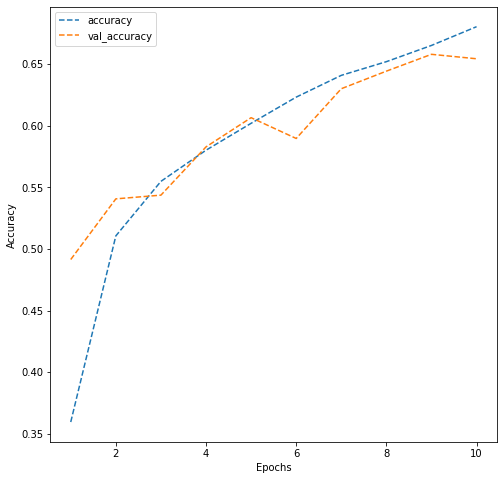

In [ ]:
# Plotting the accuracies

dict_hist = history_best_model_3.history

list_ep = [i for i in range(1, 11)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Lets try another ten epochs

Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 0.7424 - accuracy: 0.6879
Epoch 1: val_accuracy did not improve from 0.65803
473/473 [==============================] - 16s 34ms/step - loss: 0.7424 - accuracy: 0.6879 - val_loss: 0.8502 - val_accuracy: 0.6464
Epoch 2/10
472/473 [============================>.] - ETA: 0s - loss: 0.7251 - accuracy: 0.7012
Epoch 2: val_accuracy did not improve from 0.65803
473/473 [==============================] - 16s 33ms/step - loss: 0.7248 - accuracy: 0.7012 - val_loss: 0.8576 - val_accuracy: 0.6544
Epoch 3/10
472/473 [============================>.] - ETA: 0s - loss: 0.7142 - accuracy: 0.7044
Epoch 3: val_accuracy improved from 0.65803 to 0.66426, saving model to ./best_model2.h5
473/473 [==============================] - 16s 34ms/step - loss: 0.7143 - accuracy: 0.7042 - val_loss: 0.8420 - val_accuracy: 0.6643
Epoch 4/10
472/473 [============================>.] - ETA: 0s - loss: 0.6899 - accuracy: 0.7149
Epoch 4: val_accuracy did 

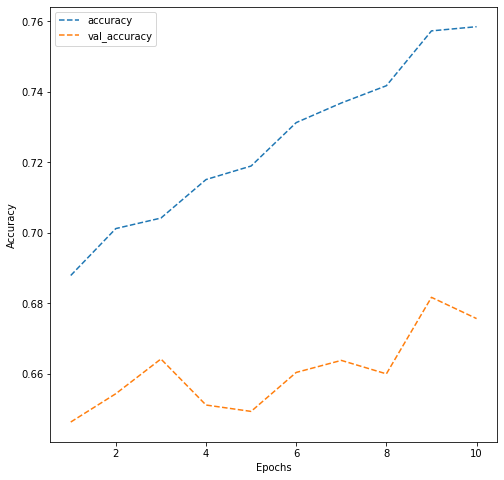

In [ ]:
history_best_model_3=best_model_3.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=10,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_3.history

list_ep = [i for i in range(1, 11)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

It is now pretty clearly overfitting. Lets try some methods to decrease that. We can start with dropout.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 96)        2496      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 48)        115248    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 48)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 48)        0

ValueError: ignored

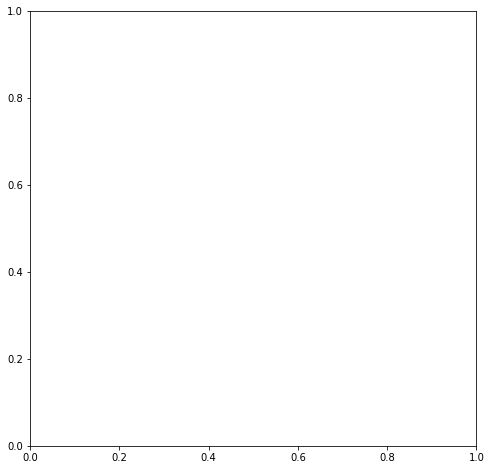

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )
checkpoint = ModelCheckpoint("./best_model4.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, early_stopping]
dropout = 0.2

def build_model():
      model = Sequential()
      model.add(Conv2D(filters=96, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Flatten())
      model.add(Dense(96, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(32, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(32, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return model

best_model_4 = build_model()

best_model_4.summary()

history_best_model_4=best_model_4.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_4.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])-1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()


Excuse that error, please.

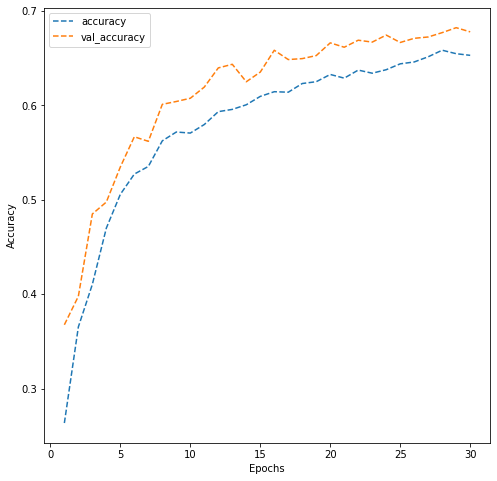

In [ ]:
list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

It appears the model is underfitting again. Lets try further increasing the complexity.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 96)        2496      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 96)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 96)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 48)        115248    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 48)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 48)       

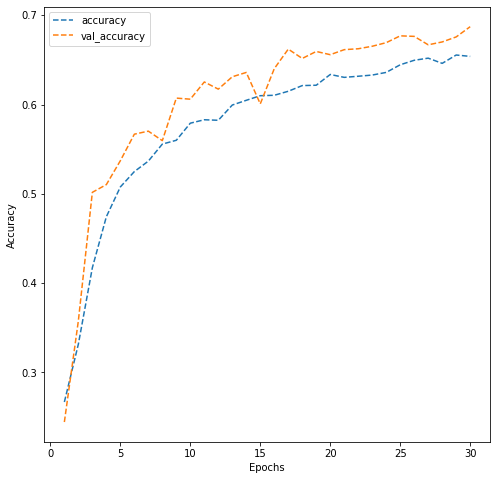

In [ ]:
dropout = 0.2
checkpoint = ModelCheckpoint("./best_model5.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, early_stopping]
def build_model():
      model = Sequential()
      model.add(Conv2D(filters=96, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Flatten())
      model.add(Dense(96, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return model

best_model_5 = build_model()

best_model_5.summary()

history_best_model_5=best_model_5.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_5.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Continuing to underfit. Lets further increase complexity and decrease dropout.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 96)        2496      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 96)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 96)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 48)        115248    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 48)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 12, 12, 48)       

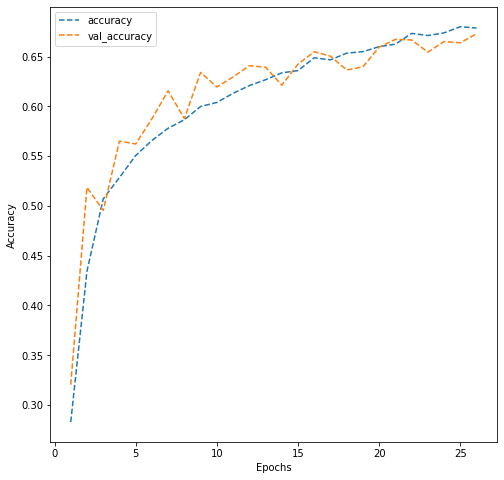

In [ ]:
dropout = 0.1
checkpoint = ModelCheckpoint("./best_model6.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, early_stopping]
def build_model():
      model = Sequential()
      model.add(Conv2D(filters=96, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Conv2D(filters=48, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
      model.add(MaxPooling2D())
      model.add(Dropout(dropout))
      model.add(Flatten())
      model.add(Dense(96, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return model

best_model_6 = build_model()

best_model_6.summary()

history_best_model_6=best_model_6.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_6.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Still underfitting, lets try to further workshop the model. Lets try increasing the number of filters.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 256)       

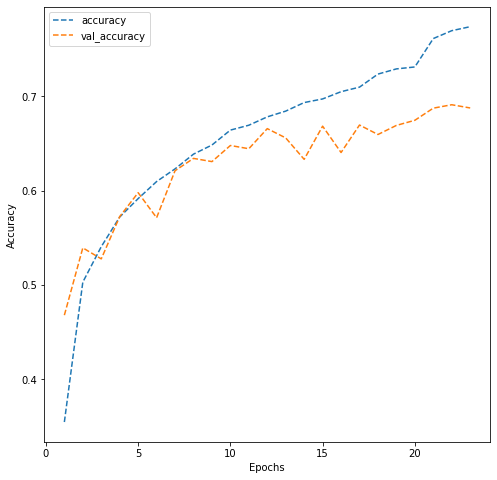

In [ ]:
checkpoint = ModelCheckpoint("./best_model7.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 8,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]
def build_model():
      dropout = 0.1 # still working well
      model = Sequential()
      model.add(Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
      #model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
      #model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Flatten())
      model.add(Dense(64, activation='relu'))
      #model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
      return model

best_model_6 = build_model()

best_model_6.summary()

history_best_model_6=best_model_6.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_6.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Now the model is overfitting but performing slightly better. Lets increase dropout and decrease ReduceLROnPlateau patience

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 256)       

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


472/473 [============================>.] - ETA: 0s - loss: 1.3228 - accuracy: 0.3285
Epoch 1: val_accuracy improved from -inf to 0.45630, saving model to ./best_model8.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.3225 - accuracy: 0.3289 - val_loss: 1.2103 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.1635 - accuracy: 0.4721
Epoch 2: val_accuracy improved from 0.45630 to 0.52180, saving model to ./best_model8.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.1631 - accuracy: 0.4726 - val_loss: 1.0777 - val_accuracy: 0.5218 - lr: 0.0010
Epoch 3/30
471/473 [============================>.] - ETA: 0s - loss: 1.0688 - accuracy: 0.5263
Epoch 3: val_accuracy improved from 0.52180 to 0.55857, saving model to ./best_model8.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.0689 - accuracy: 0.5262 - val_loss: 1.0081 - val_accuracy: 0.5586 - lr: 0.0010
Epoch 4/30
472/473 [=

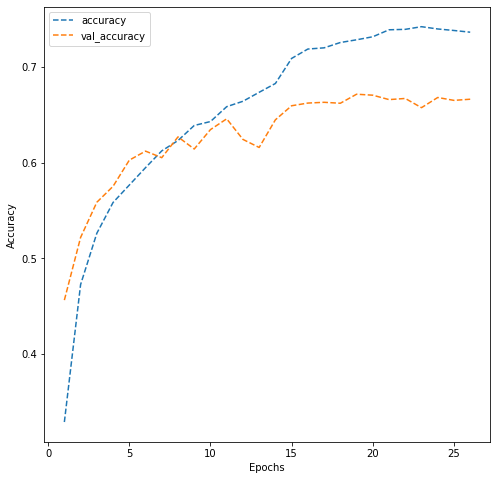

In [ ]:
checkpoint = ModelCheckpoint("./best_model8.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 9,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]
def build_model(dropout):
      model = Sequential()
      model.add(Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
      #model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
      #model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Flatten())
      model.add(Dense(64, activation='relu'))
      #model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
      return model

best_model_8 = build_model(0.15)

best_model_8.summary()

history_best_model_8=best_model_8.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_8.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Accuracy plateaued and there was still overfitting. Lets try higher dropout and lower ReduceLROnPlateau patience further and see if that fixes the overfitting.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 6, 6, 256)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


473/473 [==============================] - ETA: 0s - loss: 1.3831 - accuracy: 0.2596
Epoch 1: val_accuracy improved from -inf to 0.24432, saving model to ./best_model9.h5
473/473 [==============================] - 17s 33ms/step - loss: 1.3831 - accuracy: 0.2596 - val_loss: 1.3725 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.3825 - accuracy: 0.2587
Epoch 2: val_accuracy did not improve from 0.24432
473/473 [==============================] - 16s 33ms/step - loss: 1.3825 - accuracy: 0.2584 - val_loss: 1.3745 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 3/30
471/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2554
Epoch 3: val_accuracy improved from 0.24432 to 0.36428, saving model to ./best_model9.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.3822 - accuracy: 0.2554 - val_loss: 1.3687 - val_accuracy: 0.3643 - lr: 0.0010
Epoch 4/30
472/473 [============================>.] - ETA: 

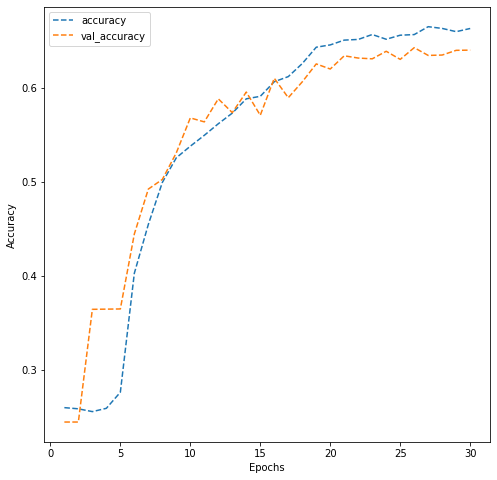

In [ ]:
checkpoint = ModelCheckpoint("./best_model9.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 2,
                              verbose = 1,
                              min_delta = 0.0001)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.0001,
                          patience = 9,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

best_model_9 = build_model(0.2)

best_model_9.summary()

history_best_model_9=best_model_9.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=30,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_9.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

No longer overfitting as much but it plateaued quicker than the last non-overfitting model. Lets increase the ReduceLROnPlateau patience, keep dropout the same, and run for more epochs.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


472/473 [============================>.] - ETA: 0s - loss: 1.3833 - accuracy: 0.2652
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to ./best_model9.h5
473/473 [==============================] - 19s 34ms/step - loss: 1.3833 - accuracy: 0.2653 - val_loss: 1.3759 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/35
471/473 [============================>.] - ETA: 0s - loss: 1.3552 - accuracy: 0.2859
Epoch 2: val_accuracy improved from 0.22885 to 0.31786, saving model to ./best_model9.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.3546 - accuracy: 0.2859 - val_loss: 1.2708 - val_accuracy: 0.3179 - lr: 0.0010
Epoch 3/35
472/473 [============================>.] - ETA: 0s - loss: 1.2343 - accuracy: 0.3850
Epoch 3: val_accuracy improved from 0.31786 to 0.44264, saving model to ./best_model9.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.2343 - accuracy: 0.3851 - val_loss: 1.1970 - val_accuracy: 0.4426 - lr: 0.0010
Epoch 4/35
471/473 [=

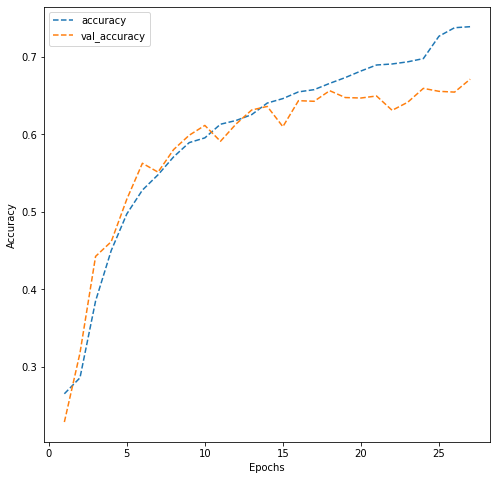

In [ ]:
checkpoint = ModelCheckpoint("./best_model9.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.0001,
                          patience = 6,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

best_model_9 = build_model(0.2)

best_model_9.summary()

history_best_model_9=best_model_9.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=35,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_9.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

This is overfitting again more but more accurate. Lets increase model complexity and dropout.

In [ ]:
def build_model(dropout, lr = 0.001):
      model = Sequential()
      model.add(Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same', input_shape=(48, 48, 1)))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
      #model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(2))
      #model.add(Dropout(dropout))
      model.add(Flatten())
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dropout(dropout))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(4, activation='softmax'))
      model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])
      return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 256)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


472/473 [============================>.] - ETA: 0s - loss: 1.3832 - accuracy: 0.2611
Epoch 1: val_accuracy improved from -inf to 0.24432, saving model to ./best_model10.h5
473/473 [==============================] - 17s 34ms/step - loss: 1.3832 - accuracy: 0.2612 - val_loss: 1.3765 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/35
472/473 [============================>.] - ETA: 0s - loss: 1.3827 - accuracy: 0.2649
Epoch 2: val_accuracy did not improve from 0.24432
473/473 [==============================] - 16s 33ms/step - loss: 1.3827 - accuracy: 0.2647 - val_loss: 1.3698 - val_accuracy: 0.2441 - lr: 0.0010
Epoch 3/35
473/473 [==============================] - ETA: 0s - loss: 1.3815 - accuracy: 0.2644
Epoch 3: val_accuracy improved from 0.24432 to 0.32952, saving model to ./best_model10.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.3815 - accuracy: 0.2644 - val_loss: 1.3715 - val_accuracy: 0.3295 - lr: 0.0010
Epoch 4/35
472/473 [============================>.] - ETA

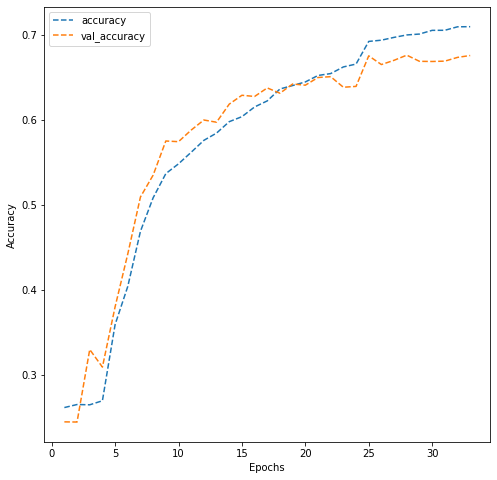

In [ ]:


checkpoint = ModelCheckpoint("./best_model10.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.0001,
                          patience = 6,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

best_model_10 = build_model(dropout = 0.2)

best_model_10.summary()

history_best_model_10=best_model_10.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=35,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_10.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

Observations: Took a bit longer to get off the ground with the increased complexity. The RLRoP patience was probably too long as the model began to overfit leading the RLRop to kill progress. Lets try a shorter patience this time.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 256)      

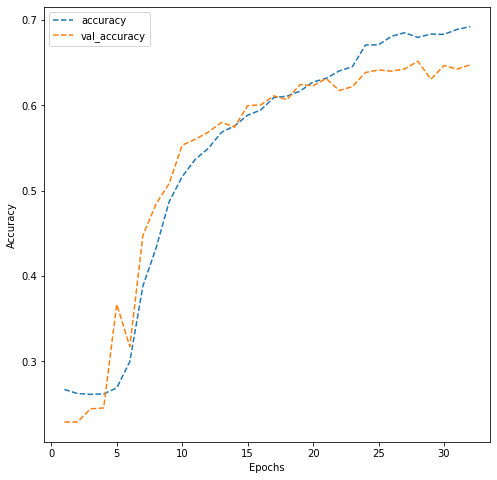

In [ ]:
checkpoint = ModelCheckpoint("./best_model10.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 2,
                              verbose = 1,
                              min_delta = 0.0001)
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.0001,
                          patience = 4,
                          verbose = 1,
                          restore_best_weights = True
                          )

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

best_model_10 = build_model(dropout = 0.2)

best_model_10.summary()

history_best_model_10=best_model_10.fit(train_set_greyscale,
                    #steps_per_epoch=len(train_set) / batch_size,
                    epochs=35,
                    validation_data=validation_set_greyscale,
                    callbacks=callbacks_list, use_multiprocessing=True)
dict_hist = history_best_model_10.history

list_ep = [i for i in range(1, len(dict_hist['accuracy'])+1)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

About the same

## **Considerations:**

* The models have had okay performance. I have been evaluating on Accuracy so far but will pivot away from that metric because of class-imbalance.
* I don't think having 'rgb' color mode is needed because the images are already black and white

### <u>**Proposed Approach**</u>

- **Potential techniques:** Transfer learning, further data augmentation, e.g., rotation, vertical, flipping, zoom, attention layers, ensemble methods(bootstrapped ensembles, bagging, boosting), hyperparameter tuning techniques such as Bayesian optimization to find the optimal set of hyperparameters.
<br>
- **Overall solution design:** <br>
1. Further data augmentation
2. Continue to experiment with dropout, add batch normalization layers, attention layers 
- **Measures of success:** precision and recall, F1-score, or ROC-AUC<br>